<a href="https://colab.research.google.com/github/Saranyanv/test/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os 
import numpy as np
import tensorflow as tf
import zipfile
from tqdm import tqdm
# Working with images
import cv2
import re
from matplotlib import pyplot as plt

# Display Images
from PIL import Image, ImageFilter

# IPython display
from IPython.display import display

RANDOM_SEED = 42

In [0]:
IMG_WIDTH = 50
IMG_HEIGHT = 50
IMG_CHANNELS = 1

In [0]:
# To make output stable across runs
def reset_graph(seed= RANDOM_SEED):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!ls -l "drive/My Drive/MSPA/Predict 422/Week 7/all.zip"

-rw------- 1 root root 851576569 Dec  4 02:01 'drive/My Drive/MSPA/Predict 422/Week 7/all.zip'


In [6]:
!unzip "drive/My Drive/MSPA/Predict 422/Week 7/all.zip"

Archive:  drive/My Drive/MSPA/Predict 422/Week 7/all.zip
  inflating: sampleSubmission.csv    
  inflating: train.zip               
  inflating: test1.zip               


In [0]:
!unzip train.zip

In [0]:
!ls -lrt /content/train

In [0]:
def label_img(img_name):
  if 'cat.' in img_name: return 0
  elif 'dog.' in img_name: return 1 
  
def img_index(img_name):
  if 'cat.' in img_name: knt=0
  elif 'dog.' in img_name: knt=1
  num=int(re.sub("\D", "", img_name))
  return ((12500*knt) + num)

def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="bicubic")
    plt.axis("off")
    
def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="bicubic")
    plt.axis("off")

In [10]:
print (label_img('cats_dogs_images/dog.1.jpg'))

1


In [0]:
from os import listdir
import cv2 as cv2

training_data_X = []
training_data_y = []
training_data_kNN = []

for z in listdir("/content/train"):
    label = label_img(z)
    img_indx = img_index(z)
    img_str=cv2.imread(os.path.join("/content/train", z),cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img_str, (IMG_WIDTH, IMG_HEIGHT))
    img_flat = cv2.resize(img_str, (IMG_WIDTH, IMG_HEIGHT)).flatten()

    #training_data.append([ np.array(img_indx), np.array(img), np.array(label)])
    training_data_X.append(img)
    training_data_kNN.append(img_flat)
    training_data_y.append(label)

In [0]:
#training_data_X_20 = training_data_X[0:2500]
#training_data_y_20 = training_data_y[0:2500]
#training_data_X = training_data_X_20
#training_data_y = training_data_y_20

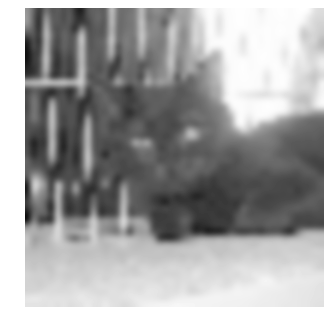

In [13]:
#plot_image(training_data[0][1])
plot_image(training_data_X[0])

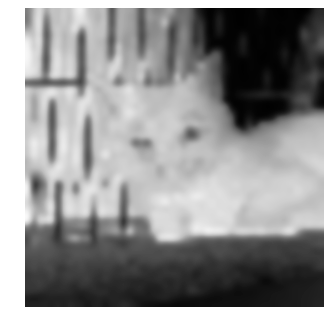

In [14]:
plot_color_image(training_data_X[0])

In [15]:
import keras
from keras import Sequential, regularizers
from keras import optimizers
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout, LocallyConnected2D, BatchNormalization
from keras.layers import Activation, Dense, advanced_activations
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
from keras import backend as K
K.set_image_dim_ordering('tf')
training_data_X_reshaped=np.array(training_data_X).reshape(-1, 50, 50, 1) / 255.0
#training_data_y_reshaped=to_categorical(training_data_y, num_classes = 2)
training_data_y_reshaped=np.array(training_data_y)

In [17]:
print (training_data_X_reshaped.shape, training_data_y_reshaped.shape)

(25000, 50, 50, 1) (25000,)


# CNN Model

In [23]:
K.get_session().close()
K.set_session(tf.Session())
K.get_session().run(tf.global_variables_initializer())

import tensorflow as tf
from tensorflow.keras import layers

'''model = tf.keras.Sequential([keras.layers.Flatten(input_shape=(50, 50)),
                            keras.layers.Dense(150, activation=tf.nn.relu),
                            keras.layers.Conv2D(32, 3*3, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None),
                            keras.layers.Dense(10, activation=tf.nn.softmax)
                            ])'''
'''
model = Sequential()
#model.add(Dense(150, input_shape=(50,50,1), activation='relu')) #25000 images, with 50*50 pixels in plain (1 channels, if RGB use 3)
model.add(Conv2D(filters=3, kernel_size=(3*3), strides=(1, 1), input_shape=training_data_X_reshaped.shape[1:]
                 , padding='same', data_format="channels_last", dilation_rate=(1, 1)
                 , activation="relu"))
#model.add(BatchNormalization())

model.add(Conv2D(filters=5, kernel_size=(3*3), padding='same', activation="relu"))
#model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2) , strides=(2,2)))

model.add(Conv2D(filters=10, kernel_size=(3*3), padding='same', activation="relu"))
#model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2) , strides=(2,2)))

#model.add(LocallyConnected2D(10, 3*3, strides=(1, 1), padding='valid', data_format=None, 
#                   activation=tf.nn.relu, use_bias=True, kernel_initializer='glorot_uniform', 
#                   bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, 
#                   activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
#model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(50, activation=tf.nn.relu))
#model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Dense(1, activation=tf.nn.softmax))
#model.add(BatchNormalization())
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
'''

'\nmodel = Sequential()\n#model.add(Dense(150, input_shape=(50,50,1), activation=\'relu\')) #25000 images, with 50*50 pixels in plain (1 channels, if RGB use 3)\nmodel.add(Conv2D(filters=3, kernel_size=(3*3), strides=(1, 1), input_shape=training_data_X_reshaped.shape[1:]\n                 , padding=\'same\', data_format="channels_last", dilation_rate=(1, 1)\n                 , activation="relu"))\n#model.add(BatchNormalization())\n\nmodel.add(Conv2D(filters=5, kernel_size=(3*3), padding=\'same\', activation="relu"))\n#model.add(BatchNormalization())\n\nmodel.add(MaxPooling2D(pool_size=(2, 2) , strides=(2,2)))\n\nmodel.add(Conv2D(filters=10, kernel_size=(3*3), padding=\'same\', activation="relu"))\n#model.add(BatchNormalization())\n\nmodel.add(MaxPooling2D(pool_size=(2, 2) , strides=(2,2)))\n\n#model.add(LocallyConnected2D(10, 3*3, strides=(1, 1), padding=\'valid\', data_format=None, \n#                   activation=tf.nn.relu, use_bias=True, kernel_initializer=\'glorot_uniform\', \n#  

In [0]:
K.get_session().close()
K.set_session(tf.Session())
K.get_session().run(tf.global_variables_initializer())

import tensorflow as tf
from tensorflow.keras import layers

model=Sequential()
model.add(Conv2D(kernel_size=(3,3),filters=3,input_shape=training_data_X_reshaped.shape[1:],activation="relu"))
model.add(Conv2D(kernel_size=(3,3),filters=10,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(kernel_size=(3,3),filters=3,activation="relu"))
model.add(Conv2D(kernel_size=(5,5),filters=5,activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2), padding='valid'))
#model.add(BatchNormalization())
model.add(Conv2D(kernel_size=(2,2),strides=(2,2),filters=10,activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2), padding='valid')) #newly added 1
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
#opt=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
#model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 3)         30        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 48, 48, 10)        280       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 10)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 22, 22, 3)         273       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 18, 18, 5)         380       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 5)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 10)          210       
__________

In [0]:
ProgbarLogger = keras.callbacks.ProgbarLogger(count_mode='samples', stateful_metrics=None)

In [29]:
model_op=model.fit(training_data_X_reshaped, training_data_y_reshaped, epochs=100, validation_split=0.1, callbacks=[ProgbarLogger],batch_size=50)

Train on 22500 samples, validate on 2500 samples
Epoch 1/5
Epoch 1/5
22500/22500 [==============================] - 66s 3ms/step - loss: 0.5512 - acc: 0.7216 - val_loss: 0.5322 - val_acc: 0.7464
Epoch 2/5
Epoch 2/5
22500/22500 [==============================] - 66s 3ms/step - loss: 0.5464 - acc: 0.7285 - val_loss: 0.5336 - val_acc: 0.7316
Epoch 3/5
Epoch 3/5
22500/22500 [==============================] - 66s 3ms/step - loss: 0.5435 - acc: 0.7281 - val_loss: 0.5244 - val_acc: 0.7472
Epoch 4/5
Epoch 4/5
22500/22500 [==============================] - 66s 3ms/step - loss: 0.5419 - acc: 0.7321 - val_loss: 0.5343 - val_acc: 0.7372
Epoch 5/5
Epoch 5/5
22500/22500 [==============================] - 66s 3ms/step - loss: 0.5382 - acc: 0.7329 - val_loss: 0.5358 - val_acc: 0.7356


In [31]:
model.metrics_names

['loss', 'acc']

In [41]:
print(model_op.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


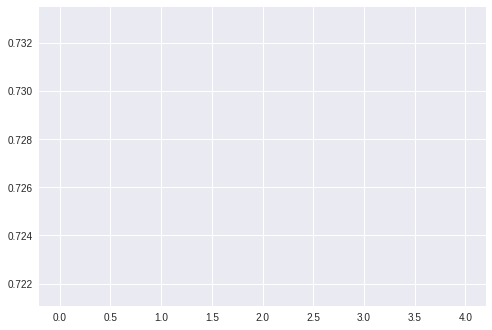

In [39]:
import matplotlib.pyplot as plt
plt.plot(model_op.history['acc'], 'b+')
plt.plot(model_op.history['val_acc'], 'ro')
plt.plot(model_op.history['loss'], 'b-')
plt.plot(model_op.history['val_loss'], 'r-')
plt.show()

# kNN Model

In [0]:
from sklearn.model_selection import train_test_split
training_data_kNN_reshaped=np.array(training_data_kNN).reshape(len(training_data_kNN), -1) / 255.0
X_train, X_test, y_train, y_test = train_test_split(training_data_kNN_reshaped, training_data_y_reshaped, test_size = 0.2) #20% data used

In [0]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train, y_train)

In [0]:
accuracy = kNN.score(X_test, y_test)
print(accuracy)

In [0]:
print(kNN.predict(X_test))